In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# for easier reading np
np.set_printoptions(precision=3,suppress=True)

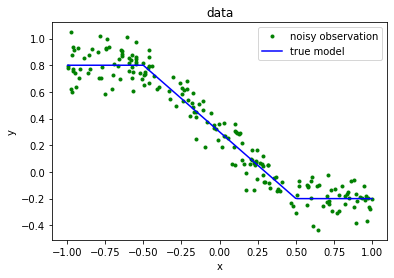

In [2]:
K = 200
x = np.sort(np.random.rand(200) * 2 -1)
y0 = 0.8*(x<-0.5) - 0.2*(x>0.5) + 0.3*((x>=-0.5)&(x<=0.5))-x*((x>=-0.5)&(x<=0.5))
y = y0 + 0.1*np.random.randn(K)
plt.plot(x,y,'g.',x,y0,'b-')
plt.legend(('noisy observation','true model'))
plt.title('data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
# Use 3-way cross validation 
x = x.reshape((K,1))
y = y.reshape((K,1))
cv = KFold(n_splits=3, shuffle=True, random_state=1)
M = 10 # max polynomial order to test
scoreVal = np.ones(M) # fitting error for each polynomial order 1 to M
for m in range(1,M+1):
  poly = PolynomialFeatures(degree=m)
  x_ = poly.fit_transform(x)
  clf = LinearRegression()
  scores = cross_val_score(clf, x_, y, scoring='r2',cv=cv)
  scoreVal[m-1] = np.mean(scores)
nMax = np.argmax(scoreVal)
print(scoreVal)
print('Polynomial order = ', nMax+1, ' that maximized r2 score : ', format(scoreVal[nMax],".3f"))


[0.893 0.891 0.944 0.942 0.943 0.943 0.943 0.942 0.942 0.94 ]
Polynomial order =  3  that maximized r2 score :  0.944


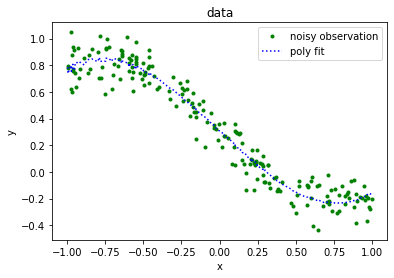

In [4]:
# display the polynomial estimates
poly = PolynomialFeatures(degree=nMax+1)
x_ = poly.fit_transform(x)
y_pred = np.zeros((K,1))
clf = LinearRegression() 
for train_index, test_index in cv.split(x_):
  clf.fit(x_[train_index],y[train_index])
  y_pred[test_index] = clf.predict(x_[test_index])
plt.plot(x,y,'g.', x,y_pred,'b:')
plt.legend(('noisy observation','poly fit'))
plt.title('data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()